In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree


In [9]:
csv_file = "/root/.cache/kagglehub/datasets/uciml/iris/versions/2/Iris.csv"
data = pd.read_csv(csv_file)
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [10]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = data['Species']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [15]:
new_data = pd.DataFrame({
    'SepalLengthCm': [5.1, 6.7, 4.9],
    'SepalWidthCm': [3.5, 3.0, 3.1],
    'PetalLengthCm': [1.4, 5.2, 1.5],
    'PetalWidthCm': [0.2, 2.3, 0.1]
})

print(model.predict(new_data))

['Iris-setosa' 'Iris-virginica' 'Iris-setosa']


In [17]:
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



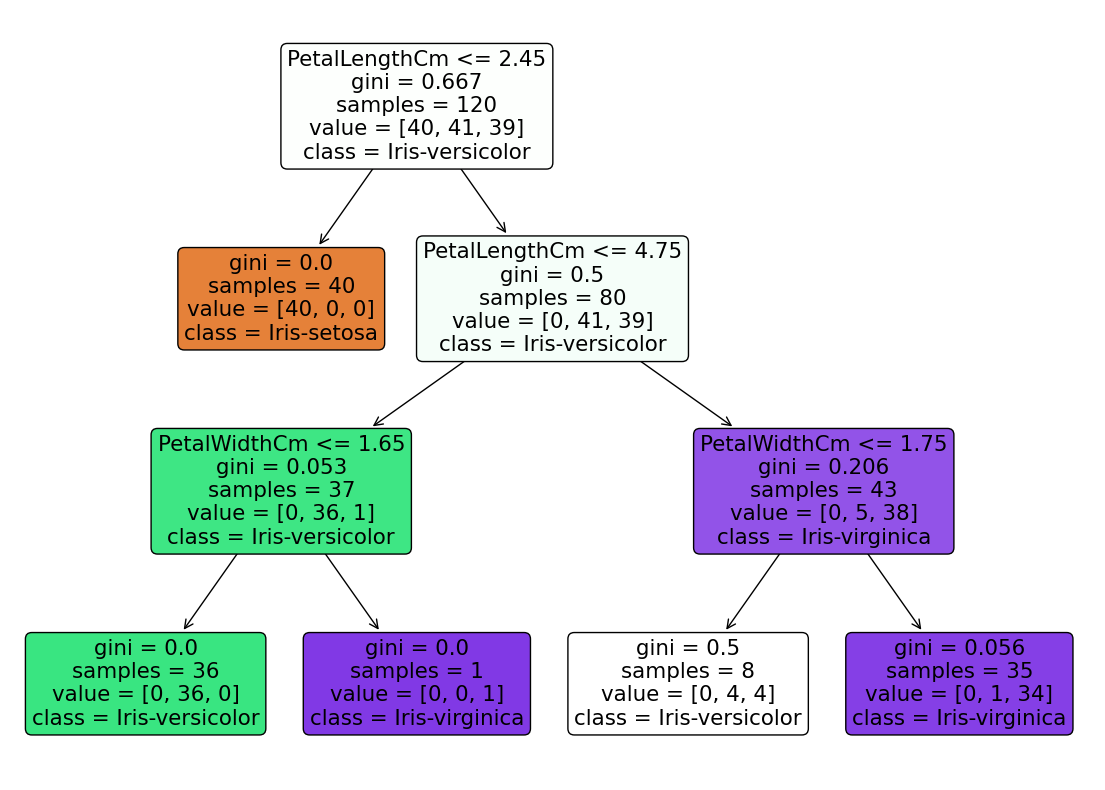

In [27]:
plt.figure(figsize=(14, 10))
tree.plot_tree(
    model,
    feature_names=list(X.columns),
    class_names=list(model.classes_),
    filled=True,
    rounded=True
)
plt.show()